# Data Analysis Interview Challenge

In [839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from datetime import datetime as dt

In [840]:
# set plot style
plt.rcParams['font.family'] = "serif"

# Part 1 - Exploratory data analysis

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [841]:
import os
cwd = os.getcwd()

In [842]:
# load json into python dict of login times
l = open(f'{cwd}/data/logins.json')
logins = json.load(l)

In [843]:
data_df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [844]:
# create df for easier indexing
logins_df = pd.DataFrame.from_dict(logins)

In [845]:
logins_df1 = logins_df.copy()

In [846]:
logins_df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [847]:
# aggregate logins based on 15 min time intervals

print(f"Login time min: {logins_df['login_time'].min()}") 
print(f"Login time max: {logins_df['login_time'].max()}")

Login time min: 1970-01-01 20:12:16
Login time max: 1970-04-13 18:57:38


In [848]:
logins_df['count'] = 1
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

The json file had dates out of order. Potential data quality issue.

In [849]:
sorted_logins = logins_df.sort_values(by='login_time').reset_index(drop=True)

In [850]:
sorted_logins.head(5)

,login_time,count
0,1970-01-01 20:12:16,1
1,1970-01-01 20:13:18,1
2,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:16:37,1


In [851]:
logins_df.rename(columns={'login_time':'login_interval'}, inplace=True)

In [852]:
logins_df.set_index('login_interval', inplace=True)

In [853]:
# aggregate df into 15 min datetime index and counts
interval_idx = logins_df.groupby(pd.Grouper(axis=0, level=0, freq='15min')).sum()
interval_idx.head(5)

,count
login_interval,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [854]:
intervals_df = interval_idx.copy().reset_index()

intervals_df['date'] = pd.to_datetime(intervals_df['login_interval']).dt.date
intervals_df['month'] = pd.to_datetime(intervals_df['login_interval']).dt.month
intervals_df['time_interval'] = pd.to_datetime(intervals_df['login_interval']).dt.time

intervals_df['num_logins'] = intervals_df['count']
intervals_df.drop(columns=['login_interval', 'count'], axis=0, inplace=True)

In [855]:
intervals_df.head(5)

,date,month,time_interval,num_logins
0,1970-01-01,1,20:00:00,2
1,1970-01-01,1,20:15:00,6
2,1970-01-01,1,20:30:00,9
3,1970-01-01,1,20:45:00,7
4,1970-01-01,1,21:00:00,1


In [856]:
# visualize and describe resulting time series to best characterize underlying pattern of demand (when are there more or less logins)

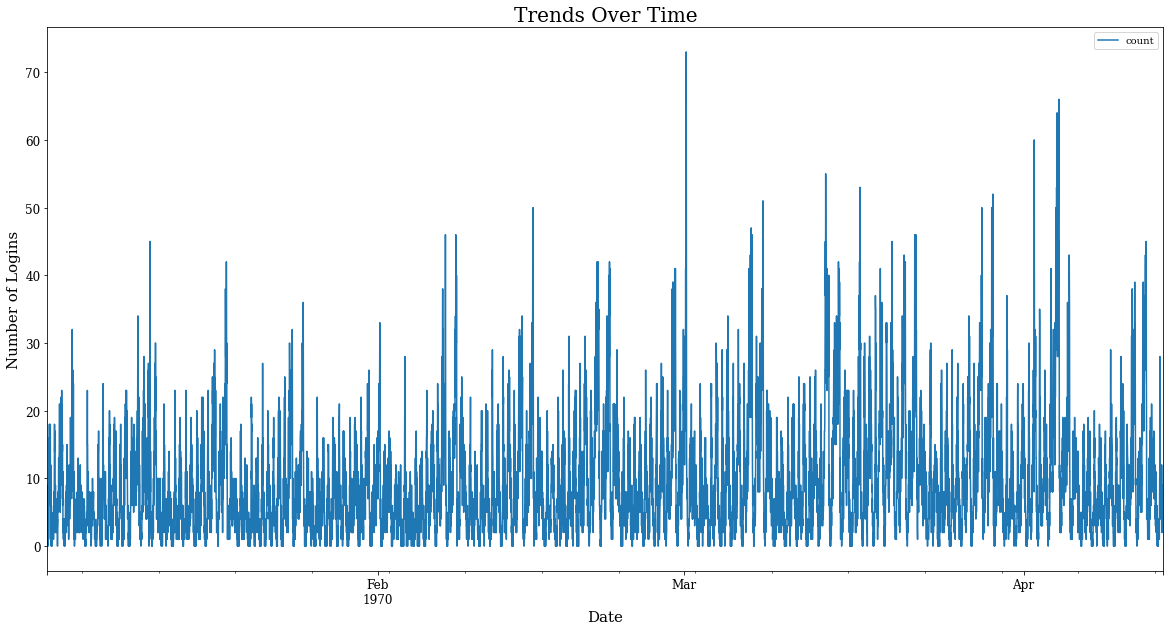

In [857]:
# loop through and plot each month - all dates 1970 - Jan - April
interval_idx.plot(y='count', figsize=(20,10))
plt.title('Trends Over Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Logins', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

clearly some pattern

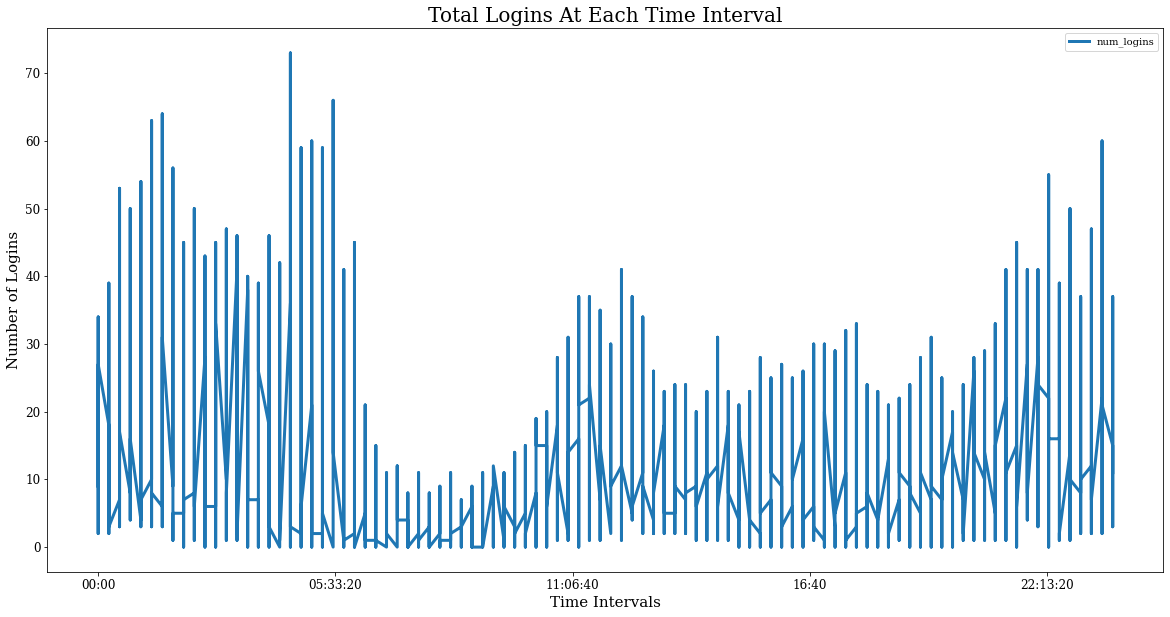

In [858]:
intervals_df.plot(x='time_interval', y='num_logins', figsize=(20,10), kind='line', linewidth=3)
plt.title('Total Logins At Each Time Interval', fontsize=20)
plt.xlabel('Time Intervals', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Logins', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

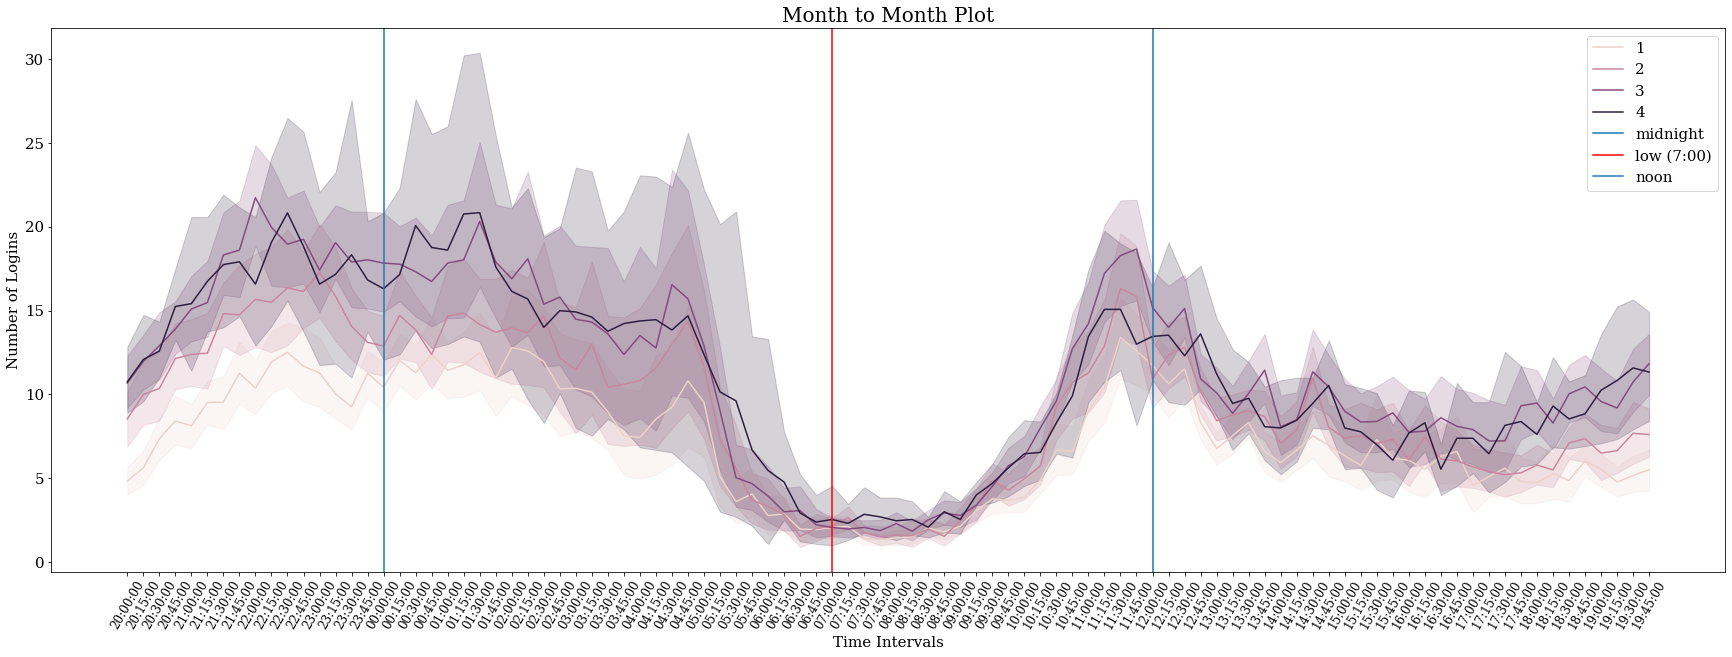

In [859]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.lineplot(data=intervals_df, x=intervals_df['time_interval'].astype(str),
                  y='num_logins', hue='month')
plt.title('Month to Month Plot', fontsize=20)
plt.xlabel('Time Intervals', fontsize=15)
plt.xticks(fontsize=12, rotation=60)
plt.ylabel('Number of Logins', fontsize=15)
plt.yticks(fontsize=15)
ax.axvline('00:00:00', label='midnight')
ax.axvline('07:00:00', label='low (7:00)', color='r')
ax.axvline('12:00:00', label='noon')
plt.legend(fontsize=15)
plt.show()

The number of logins follows a daily cyclic pattern but number of logins at each time also increases as the months continue on.

Login counts decrease between roughly 5:00 and 8:00, increasing to end the lull in a peak at around 11:30.

The largest number of logins occur during roughly 20:00 and 5:00.

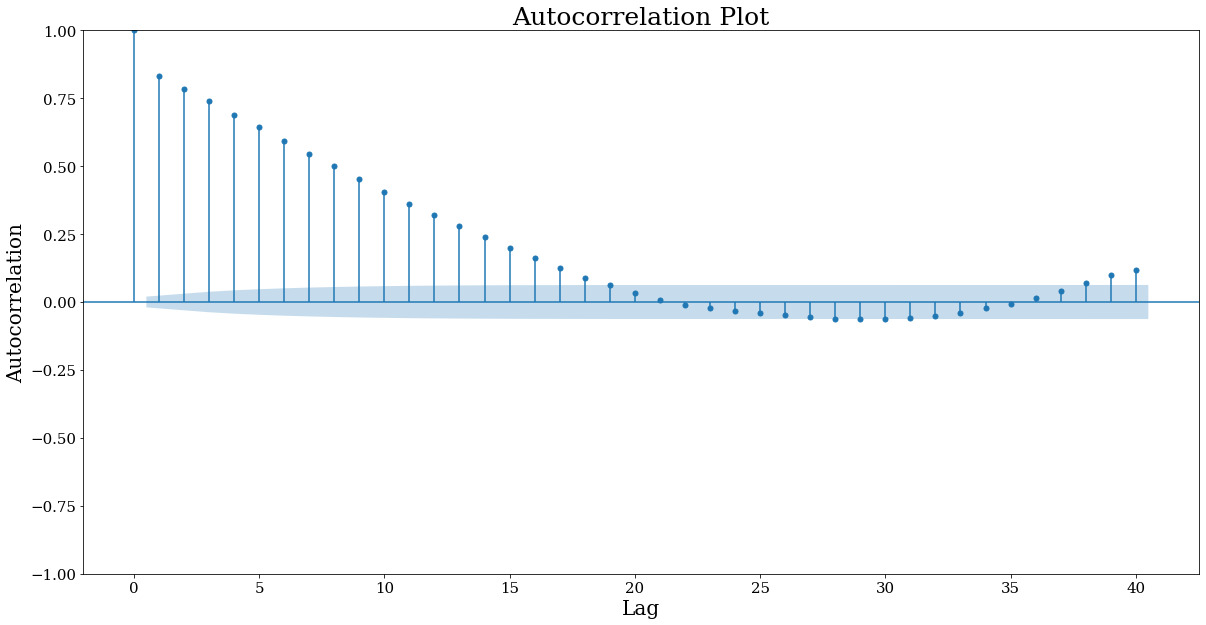

In [860]:
from statsmodels.graphics.tsaplots import plot_acf, month_plot

fig, ax = plt.subplots(figsize=(20,10))
plot_acf(interval_idx, ax=ax)
plt.title('Autocorrelation Plot', fontsize=25)
plt.xlabel('Lag', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Autocorrelation', fontsize=20)
plt.yticks(fontsize=15)
#plt.fill_between(y, 0.75, -0.75)
plt.show()

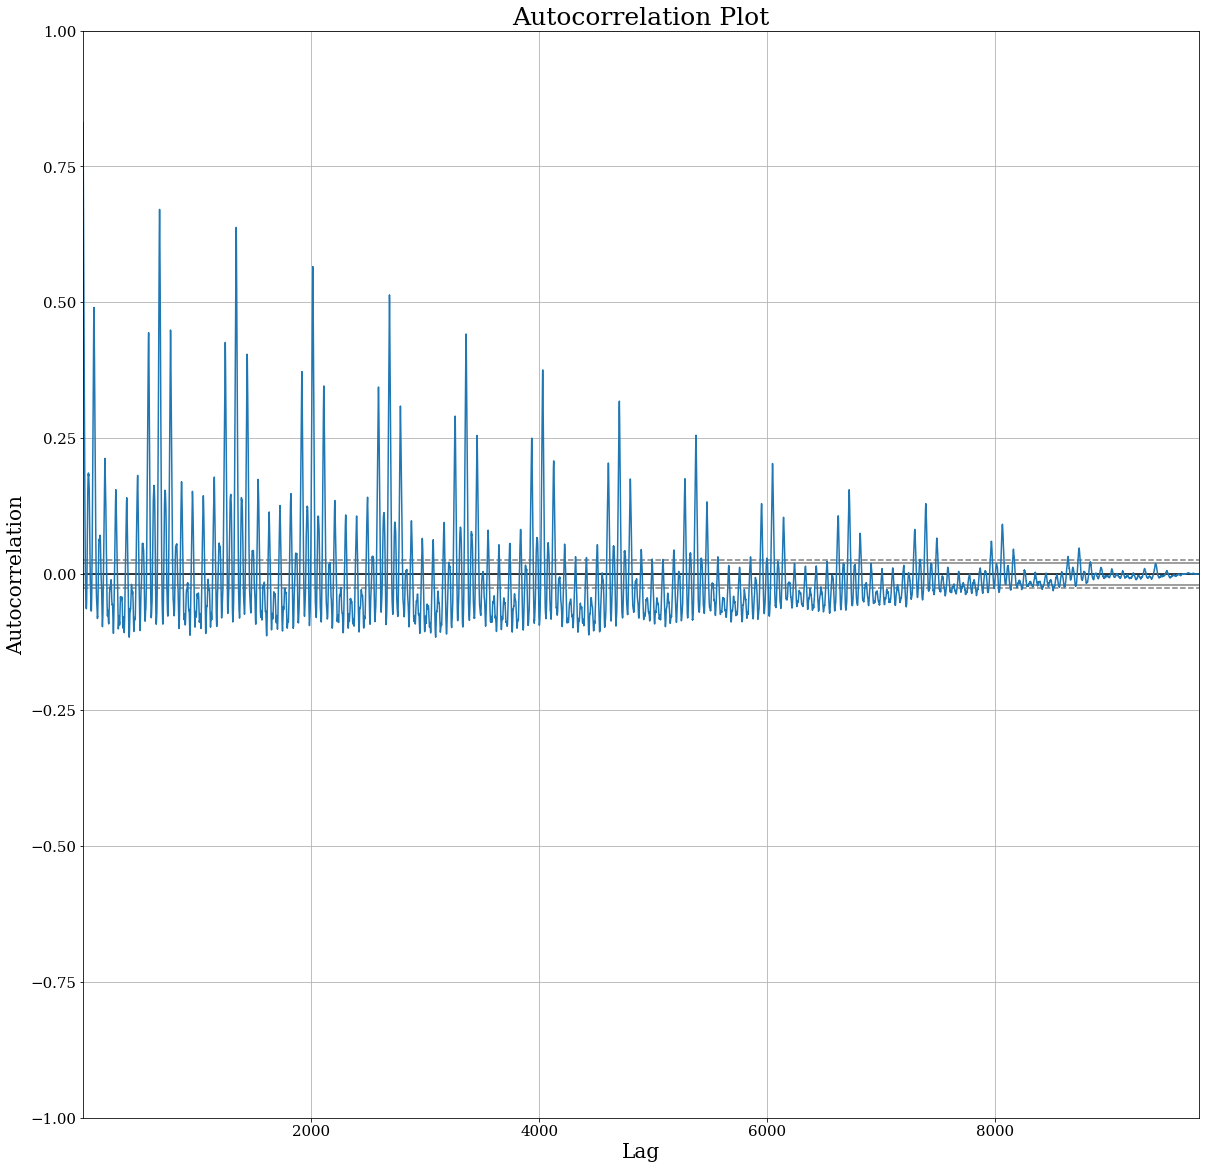

In [861]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(20,20))
plt.title('Autocorrelation Plot', fontsize=25)
plt.xlabel('Lag', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Autocorrelation', fontsize=20)
plt.yticks(fontsize=15)
autocorrelation_plot(interval_idx)
plt.show()

In [862]:
# add days of the week column 1970-01-01 was a Thursday

intervals_df['date'] = pd.to_datetime(intervals_df['date'])
weekdays = []
for i in range(len(intervals_df)):
    date = intervals_df['date'][i]
    weekday = dt.weekday(date)
    weekdays.append(weekday)


In [863]:
intervals_df['weekday'] = weekdays

In [864]:
# map weekday numbers to names in new column
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
intervals_df['day_of_week'] = intervals_df['weekday'].map(days)


In [865]:
intervals_df.head(5)

,date,month,time_interval,num_logins,weekday,day_of_week
0,1970-01-01,1,20:00:00,2,3,Thursday
1,1970-01-01,1,20:15:00,6,3,Thursday
2,1970-01-01,1,20:30:00,9,3,Thursday
3,1970-01-01,1,20:45:00,7,3,Thursday
4,1970-01-01,1,21:00:00,1,3,Thursday


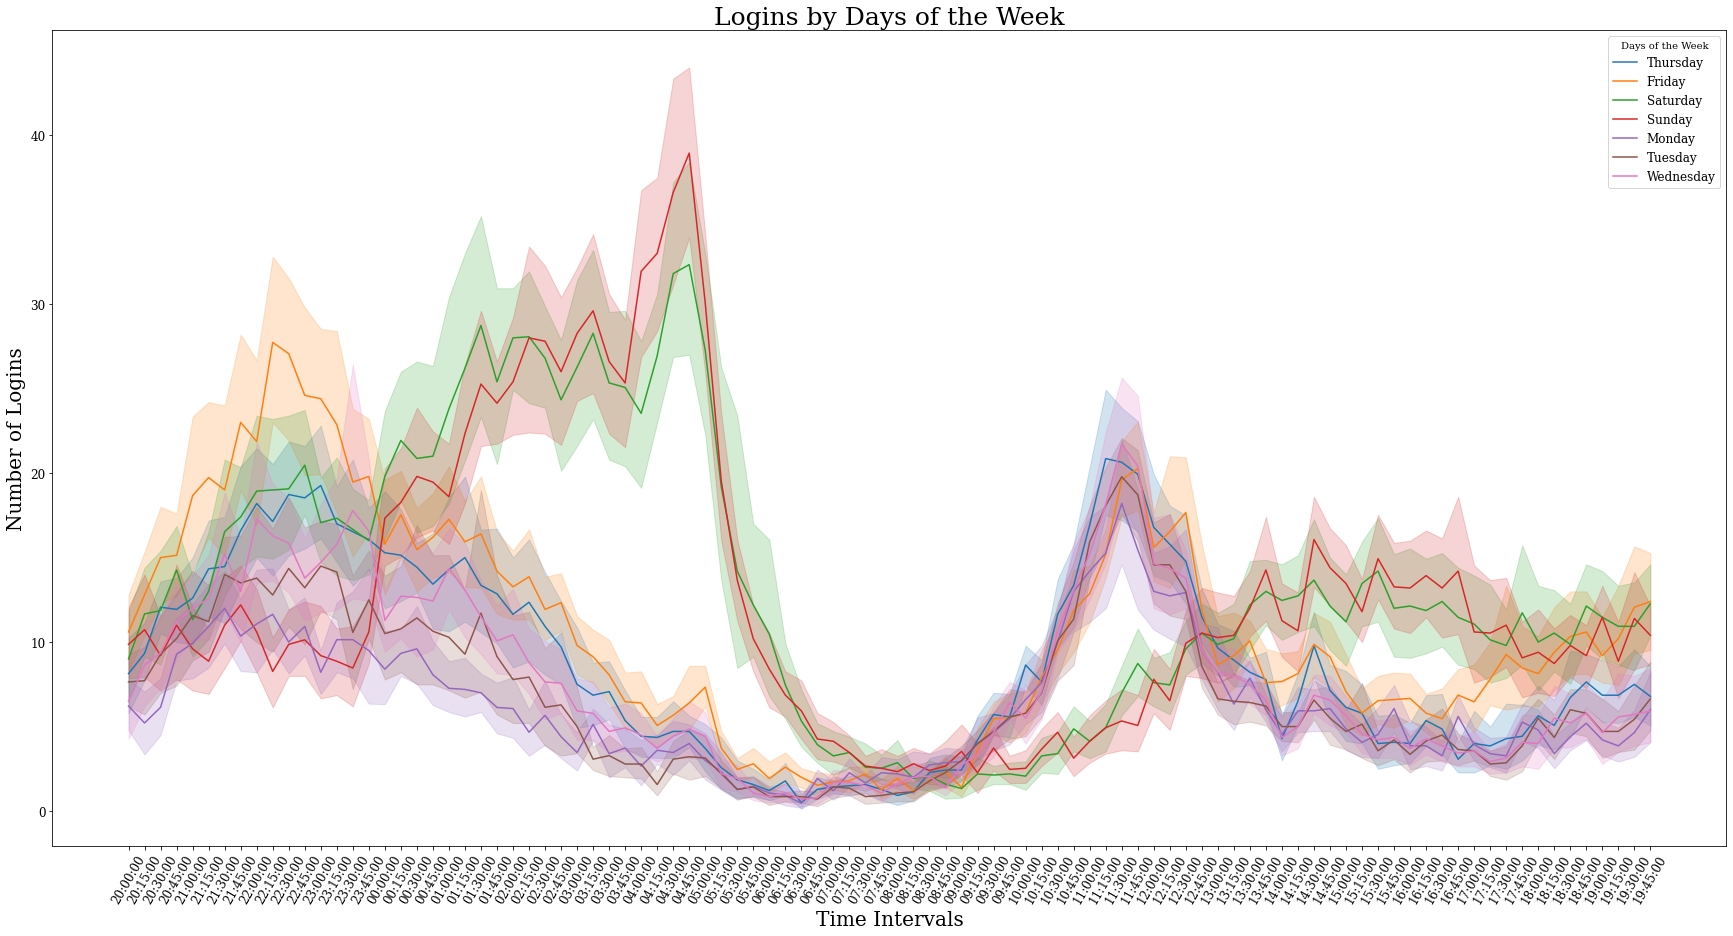

In [866]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.lineplot(data=intervals_df, x=intervals_df['time_interval'].astype(str),
                  y='num_logins', hue='day_of_week')
plt.title('Logins by Days of the Week', fontsize=25)
plt.xlabel('Time Intervals', fontsize=20, labelpad=4)
plt.xticks(fontsize=12, rotation=60)
plt.ylabel('Number of Logins', fontsize=20)
plt.yticks(fontsize=12)
plt.legend(title='Days of the Week', fontsize=12)
plt.show()

Daily cycle differs somewhat between days of the week. 
A greater number of total logins occurred between 00:00 (midnight) to 5:00 on Saturday and Sunday, compared to the rest of the dyas of the week.
A greater number of total logins occurred between 9:00 to 12:00 (noon) on weekdays.

Could possibly be due to a difference in sleep schedule? 

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the observation
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

In [867]:
# managers want to encourage drivers to be available in both cities by reimbursig all toll costs

# how much would that cost vs the money the company is making?

#A key measure of success in this experiment would be a percentage increase in drivers crossing the toll bridge 
#during the night/day and how much profit was made after subtracting cost of reimbursing tolls


In [ ]:
On weekends, the two cities are reasonably similar in activity. If Ultimate Metropolis is most active during the day, 
How many Ultimate Gotham drivers were taking rides in Ultimate Metropolis during the day, since Ultimate Gotham 
is most active at night and Ultimate Metropolis is most active during the day. 

People driving full time would have more of an incentive to come from Ultimate Gotham to Metropolis during the day, 
but Metropolis drivers will have a good amount of rides during the day and the evening. 
Enough that they may not be as incentivized. 

In [ ]:
could count drivers taking rides in other city as "conversion rate"
cost per acquisition (cost of tolls)
growth rate (how many more rides completed)

does cost of rides increase with more availability of drivers into the other city? 
or number of rides completed increase?

how much is the toll?

Does this result in new drivers? Does this result in existing drivers doing more rides? 
Does this increase ride availability to people farther away and so they take more expensive rides between cities?

In [ ]:
Null hypothesis:
Alternate hypothesis:

Statistical test for significance:


# Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [ ]:
# goals -- understand what factors are best predictors for retention
# offer suggesions to operationalize those insights

# Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis 
# (a few sentences/plots describing your approach will suffice)
# What fraction of the observed users were retained?


# these users signed up in Jan 2014

In [903]:
# load json into python dict of challenge data
d = open(f'{cwd}/data/ultimate_data_challenge.json')
challenge_data = json.load(d)

In [904]:
data_df = pd.DataFrame.from_dict(challenge_data)

In [905]:
data_df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [906]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [907]:
data_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [908]:
# make date columns type datetime
data_df['signup_date'] = pd.to_datetime(data_df['signup_date'])
data_df['last_trip_date'] = pd.to_datetime(data_df['last_trip_date'])

In [909]:
data_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [910]:
# identify "active users" -- have used in last 30 days
active_user = []

for i in range(len(data_df)):
    last_trip = data_df['last_trip_date'][i]
    d = pd.to_datetime('2014-06-01')
    if last_trip >= d:
        active_user.append(True)
    else:
        active_user.append(False)

# make bool active user column

In [911]:
data_df['active_user'] = active_user

In [912]:
data_df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [913]:
# What fraction of the observed users were retained?

print('Active User Value Counts (Used in the last 30 days):')
print(f"True: {(data_df['active_user'] == True).sum()} -- {round((data_df['active_user'] == True).sum()/len(data_df),3)*100}%")
print(f"False: {(data_df['active_user'] == False).sum()} -- {round((data_df['active_user'] == False).sum()/len(data_df),3)*100}%")

Active User Value Counts (Used in the last 30 days):
True: 18804 -- 37.6%
False: 31196 -- 62.4%


In [914]:
# exploratory plotting

data_df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active_user'],
      dtype='object')

In [ ]:
# (a few sentences/plots describing your approach will suffice)


37.6% of users were retained.

In [ ]:
# Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 


# Discuss why you chose your approach, what alternatives you considered, and any concerns you have. 
# How valid is your model? Include any key indicators of model performance.

In [ ]:

# Discuss why you chose your approach, what alternatives you considered, and any concerns you have. 
# How valid is your model? Include any key indicators of model performance.